# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [ ]:
#Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import os
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [ ]:
# read Twitter_archive
twitter_archive = pd.read_csv("twitter_archive_enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
# Download image-predictions.tsv
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
folder = "C:/Users/HP USER/Desktop/Udacity ALT-X Data Analysis Course/Project 2 Wrangle and Analyze Data"
r = requests.get(url)
with open(os.path.join(folder, url.split('/')[-1]), mode = 'wb') as file:
        file.write(r.content)

In [ ]:
# read Image predictions
img_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [ ]:
# NOTE: THIS CODE WILL NOT EXECUTE FOR LACK OF TWITTER DEVELOPER ACCOUNT
# Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)# 
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
with open('tweet_json.txt') as f:
    tweet_json = pd.DataFrame(json.loads(line) for line in f)

## Assessing Data

In [ ]:
twitter_archive.tail()

In [ ]:
img_prediction.head()

In [ ]:
tweet_json.head()

In [ ]:
# Check tweet_json shape
tweet_json.shape

In [ ]:
# Check tweet_json shape
tweet_json.info()

In [ ]:
# Check description of tweet_json
tweet_json.describe()

In [ ]:
# null values
tweet_json.isnull().sum()

In [ ]:
# Check img_prediction shape
img_prediction.shape

In [ ]:
# Check img_prediction shape
img_prediction.info()

In [ ]:
# Check description of img_prediction
img_prediction.describe()

In [ ]:
# null values
img_prediction.isnull().sum()

In [ ]:
# Check twitter_archive shape
twitter_archive.shape

In [ ]:
# Check twitter_archive shape
twitter_archive.info()

In [ ]:
# Check twitter_archive shape
twitter_archive.describe()

In [ ]:
# Check twitter_archive shape
twitter_archive.isnull().sum()

### Missing values

* Missing values in the "twitter_archive table".

* Missing values in the "tweet_json table".

### Quality issues

1. Unwanted/Irrelevant columns for this analysis (e.g: geo, coordinates, place & contributors, in_reply_to_status_id, in_reply_to_user_id, retweeted_timestamp to datatime, retweeted_status_id and retweeted_user_id)

2. Some tweet have no images (i.e Retweets)

3. "timestamp" and "retweeted_status_timestamp" columns are string instead of datetime

4. The twitter_archive table contains "None" as values.

5. The img_predictions table has values that contain underscores.

6. The "source"  column has HTML tags.

7. Dog names in p1, p2 and p3 has inconsistent letter casing.

8. Incorrect dtypes for stage and source columns.


### Tidiness issues

1. The doggo,floofer, pupper and puppo dog stages should be in a single column.
2. Merge all three dataframes to one  (twitter_archive_master).

## Cleaning Data

### Make copies of original pieces of data


In [ ]:
twitter_archiveclean = twitter_archive.copy()

In [ ]:
img_predictionclean = img_prediction.copy()

In [ ]:
tweet_jsonclean = tweet_json.copy()

## Solutions to Quality Issues

### Issue #1: Unwanted/Irrelevant columns for this analysis

#### Define

* Drop unwanted/irrelevant Columns from all tables

#### Code

In [ ]:
twitter_archiveclean = twitter_archiveclean.drop(['retweeted_status_timestamp'], axis=1)


In [ ]:
img_predictionclean = img_prediction.drop(['jpg_url', 'img_num'], axis=1)

In [ ]:
tweet_jsonclean = tweet_jsonclean.drop(['id_str', 'entities', 'extended_entities','source','in_reply_to_status_id',
                                      'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str',
                                     'in_reply_to_screen_name','geo','coordinates','place','contributors','quoted_status','quoted_status_id_str','retweeted_status','quoted_status_id'], axis=1)

#### Test

In [ ]:
twitter_archiveclean.head(2)

In [ ]:
img_predictionclean.head()

In [ ]:
tweet_jsonclean.head(2)

### Issue #2: Some tweet have no images (i.e Retweets)

#### Define

* Drop Rows that are Retweets since these are no use.

#### Code

In [ ]:
twitter_archiveclean.drop(twitter_archive.index[twitter_archive['retweeted_status_id'] >= 1], inplace=True)

#### Test

In [ ]:
twitter_archiveclean.info()

### Issue #3: "timestamp" column is a string instead of datetime

#### Define

* Change timestamp column dtype to datetime

#### Code

In [ ]:
twitter_archiveclean['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

#### Test

In [ ]:
twitter_archiveclean.info()

### Issue #4: The twitter_archive table contains "None" as values.

#### Define

* Use np.nan ro replace all the "None" value with NaN in name, doggo, pupper,floffer, puppo columns.

#### Code

In [ ]:
# replace all None with NAN in tweet_archiveclean dataset
twitter_archiveclean.replace('None', np.nan, inplace=True)

#### Test

In [ ]:
twitter_archiveclean.head()

### Issue #5: The img_predictions table has values that contain underscores.

#### Define

* Remove Underscores from all columns values

#### Code

In [ ]:
img_predictionclean =pd.DataFrame(data=img_predictionclean)
img_predictionclean.replace(r"_"," ",regex=True, inplace=True)

#### Test

In [ ]:
img_predictionclean.head()

### Issue #6: The "source"  column has HTML tags.

#### Define

* Using regex, remove the html tags from the source column.

#### Code

In [61]:
# removing tags from source and replacing the column with the values extracted
twitter_archiveclean.source = twitter_archiveclean.source.str.extract(r'(Vine|TweetDeck|Twitter...........)',expand=True)

#### Test

In [62]:
twitter_archiveclean['source'].value_counts()

Twitter for iPhone    2042
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Issue #7: Dog names in p1, p2 and p3 has inconsistent letter casing.

#### Define

* Convert all values in the p1, p2 & p3 columns to Proper case.

#### Code

In [ ]:
# converting all str in p1,p2 and p3 to lowercase
img_predictionclean["p1"] = img_predictionclean["p1"].str.title()
img_predictionclean["p2"] = img_predictionclean["p2"].str.title()
img_predictionclean["p3"] = img_predictionclean["p3"].str.title()

#### Test

In [ ]:
img_predictionclean.head()

### Issue #8: Incorrect dtypes for stage and source columns.

#### Define

* Convert the stage and source to category dtypes.

#### Code

In [ ]:
# Run this code after running the merge column code in Issue 1 under Tidiness Issues.
# coverting to best dtypes for tweet_clean
twitter_archiveclean.stage = twitter_archiveclean.stage.astype('category')
twitter_archiveclean.source = twitter_archiveclean.source.astype('category')

#### Test

In [ ]:
twitter_archiveclean.info()

## Solutions to Tidiness Issues

### Issue #1: The doggo, floofer, pupper and puppo dog stages should be in a single column.

#### Define

* Merge the dog stage columns (doggo, pupper and puppo) into a single column called "stage".

#### Code

In [58]:
# Merge the doggo, floofer, pupper and puppo columns into a single column
twitter_archiveclean['stage']= twitter_archiveclean[['doggo', 'floofer', 'pupper', "puppo"]].apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

#### Test

In [60]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [55]:
twitter_archiveclean['stage'].value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

### Issue #2: Merge all three cleaned dataframes to one  (twitter_archive_master).

#### Define

* Merge all cleaned datasets into one single dataset.

#### Code

In [89]:
master_df = twitter_archiveclean.merge(img_predictionclean, left_on='tweet_id', right_on='tweet_id')
master_df = master_df.merge(tweet_jsonclean, left_on='tweet_id', right_on='id')

#### Test

In [90]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1994 non-null   int64              
 1   in_reply_to_status_id          23 non-null     float64            
 2   in_reply_to_user_id            23 non-null     float64            
 3   timestamp                      1994 non-null   datetime64[ns, UTC]
 4   source                         1994 non-null   object             
 5   text                           1994 non-null   object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   expanded_urls                  1994 non-null   object             
 9   rating_numerator               1994 non-null   int64              
 10  rating_denominator      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [68]:
import os.path
os.path.exists('twitter_archive_master.csv')
master_df.to_csv(r'twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [69]:
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1994 non-null   int64  
 1   in_reply_to_status_id          23 non-null     float64
 2   in_reply_to_user_id            23 non-null     float64
 3   timestamp                      1994 non-null   object 
 4   source                         1994 non-null   object 
 5   text                           1994 non-null   object 
 6   retweeted_status_id            0 non-null      float64
 7   retweeted_status_user_id       0 non-null      float64
 8   expanded_urls                  1994 non-null   object 
 9   rating_numerator               1994 non-null   int64  
 10  rating_denominator             1994 non-null   int64  
 11  name                           1448 non-null   object 
 12  doggo                          74 non-null     o

In [71]:
twitter_archive_master["lang"].value_counts()

en    1987
nl       3
in       2
eu       1
et       1
Name: lang, dtype: int64

In [72]:
max(twitter_archive_master["p1"].value_counts())

139

In [73]:
twitter_archive_master["p1"].value_counts()

Golden Retriever      139
Labrador Retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
                     ... 
Nail                    1
Timber Wolf             1
Espresso                1
Bib                     1
Desktop Computer        1
Name: p1, Length: 374, dtype: int64

In [74]:
twitter_archive_master['retweeted'].value_counts()

False    1994
Name: retweeted, dtype: int64

In [75]:
twitter_archive_master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,id,retweet_count,favorite_count
count,1.994000e+03,2.300000e+01,2.300000e+01,0.0,0.0,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1.994000e+03,1994.000000,1994.000000
mean,7.358508e+17,6.978112e+17,4.196984e+09,NaN,NaN,12.280843,10.532096,0.593941,1.344195e-01,6.024848e-02,7.358508e+17,2766.753260,8895.725677
std,6.747816e+16,4.359384e+16,0.000000e+00,NaN,NaN,41.497718,7.320710,0.271954,1.006807e-01,5.089067e-02,6.747816e+16,4674.698447,12213.193181
min,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,2.000000,0.044333,1.011300e-08,1.740170e-10,6.660209e+17,16.000000,81.000000
25%,6.758475e+17,6.732411e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,0.362857,5.393987e-02,1.619283e-02,6.758475e+17,624.750000,1982.000000
50%,7.084748e+17,6.757073e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,0.587635,1.174550e-01,4.950530e-02,7.084748e+17,1359.500000,4136.000000
75%,7.877873e+17,7.031489e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,0.846285,1.951377e-01,9.159438e-02,7.877873e+17,3220.000000,11308.000000
max,8.924206e+17,8.558181e+17,4.196984e+09,NaN,NaN,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01,8.924206e+17,79515.000000,132810.000000


In [76]:
# Check for Corrolation
twitter_archive_master.corr()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,p1_conf,p1_dog,p2_conf,...,p3_dog,id,truncated,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable
tweet_id,1.000000,0.685117,NaN,NaN,NaN,0.023630,-0.022426,0.106469,0.120656,-0.002557,...,0.097677,1.000000,NaN,NaN,0.405404,0.655276,0.063429,NaN,NaN,NaN
in_reply_to_status_id,0.685117,1.000000,NaN,NaN,NaN,-0.078811,-0.067949,0.425057,-0.079810,-0.392543,...,0.133557,0.685117,NaN,NaN,0.167515,0.595754,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_numerator,0.023630,-0.078811,NaN,NaN,NaN,1.000000,0.198240,-0.009049,-0.029150,-0.020724,...,-0.029355,0.023630,NaN,NaN,0.013879,0.009995,0.000144,NaN,NaN,NaN
rating_denominator,-0.022426,-0.067949,NaN,NaN,NaN,0.198240,1.000000,-0.004240,0.000640,-0.034964,...,0.004695,-0.022426,NaN,NaN,-0.021193,-0.028682,-0.003645,NaN,NaN,NaN
p1_conf,0.106469,0.425057,NaN,NaN,NaN,-0.009049,-0.004240,1.000000,0.126961,-0.509531,...,0.119391,0.106469,NaN,NaN,0.054591,0.079727,-0.035617,NaN,NaN,NaN
p1_dog,0.120656,-0.079810,NaN,NaN,NaN,-0.029150,0.000640,0.126961,1.000000,0.109214,...,0.558604,0.120656,NaN,NaN,0.008552,0.054368,-0.016100,NaN,NaN,NaN
p2_conf,-0.002557,-0.392543,NaN,NaN,NaN,-0.020724,-0.034964,-0.509531,0.109214,1.000000,...,0.063713,-0.002557,NaN,NaN,-0.018472,-0.021680,-0.019817,NaN,NaN,NaN


### Insights:

1. Most Tweets (1,987) are wriiten in English.

2. There are more Golden Retriever dog bread (139) than other bread. 

3. All 1,994 are were not reweeted.

4. Rating numerator and denominator have maximum values of 1776 and 170 respectively.


### Visualization

timestamp
Friday       290
Monday       321
Saturday     266
Sunday       245
Thursday     272
Tuesday      299
Wednesday    301
Name: timestamp, dtype: int64

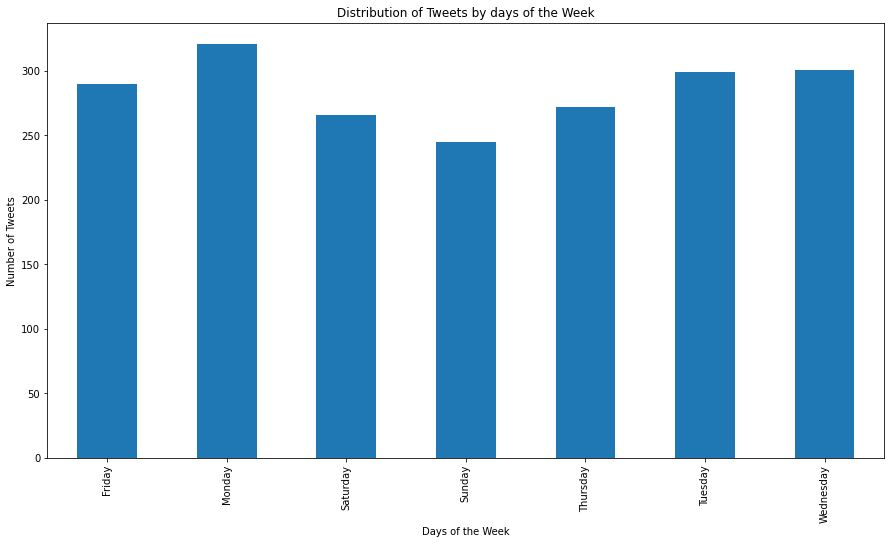

In [77]:
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])
weekdays = twitter_archive_master['timestamp'].dt.day_name() #get the week day name of each scheduled date
twitter_archive_master.groupby(weekdays)['timestamp'].count().plot(kind='bar',  figsize= (15,8), title='Distribution of Tweets by days of the Week').set(xlabel="Days of the Week", ylabel="Number of Tweets");
twitter_archive_master.groupby(weekdays)['timestamp'].count()

1. Most Tweets are made on Mondays.

In [78]:
twitter_archive_master.groupby(weekdays)['timestamp'].count().mean()

284.85714285714283

In [79]:
twitter_archive_master.stage.value_counts()

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

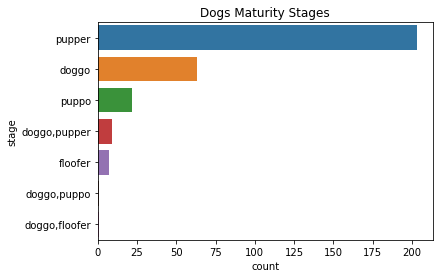

In [88]:
# plot for the count
sns.countplot(y=twitter_archive_master.stage, order=twitter_archive_master.stage.value_counts().index)
plt.title('Dogs Maturity Stages');